## Создание новых признаков

### Признак 1

Считается, что важную роль в курсах валют играет налоговая неделя, в течение которой крупнейшие компании выходят на рынки и закупаются национальной валютой для выплат в пользу бюджета. Время действия налоговой недели (подготовительный период – 15-19 числа, период платежей – 20-25 числа). Насколько сильно она влияет на процесс курсообразования тенге? На основании имеющихся признаков создадим новые. Из столбца с датой достанем является ли этот день днём налоговой недели и посмотрим на динамику курса в такие дни.

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import mannwhitneyu
from scipy.stats import ttest_1samp

In [2]:
df = pd.read_csv('table_res.csv')
df['Дата'] = pd.to_datetime(df['Дата'])

In [3]:
# создаём колонку с новым признаком
df['День налоговой недели'] = df['Дата'].apply(lambda x: 1 if (x.month == 2 or x.month == 5 or x.month == 8 or x.month == 11) and (x.day >= 20 and x.day <= 25) else 0)

In [4]:
df.head()

,Unnamed: 0,Дата,ФУНТ СТЕРЛИНГОВ,ДИРХАМ ОАЭ,ДОЛЛАР США,ЕВРО,РОССИЙСКИЙ РУБЛЬ,ТУРЕЦКАЯ ЛИРА,"Размер ставки, %","Коридор базовой ставки, %",День налоговой недели
0,0,2015-09-02,359.98,63.97,234.94,264.85,3.60,80.40,12.0,"7,0 - 17,0",0
1,1,2015-09-03,368.86,65.66,241.15,272.07,3.61,81.85,12.0,"7,0 - 17,0",0
2,2,2015-09-04,365.68,65.28,239.76,269.37,3.58,81.07,12.0,"7,0 - 17,0",0
3,3,2015-09-05,365.08,65.24,239.60,266.91,3.54,80.44,12.0,"7,0 - 17,0",0
4,4,2015-09-06,365.08,65.24,239.60,266.91,3.54,80.44,12.0,"7,0 - 17,0",0


In [5]:
# создаём новую колонку с годом для разделения данных по годам
df['Год'] = df['Дата'].dt.year

# создаём словарь для хранения данных по годам
year_dict = {year: df[df['Год']==year] for year in df['Год'].unique()}

# проверка
year_dict[2022].head()

,Unnamed: 0,Дата,ФУНТ СТЕРЛИНГОВ,ДИРХАМ ОАЭ,ДОЛЛАР США,ЕВРО,РОССИЙСКИЙ РУБЛЬ,ТУРЕЦКАЯ ЛИРА,"Размер ставки, %","Коридор базовой ставки, %",День налоговой недели,Год
2313,2313,2022-01-01,583.32,117.57,431.8,489.1,5.76,32.28,9.75,"8,75-10,75",0,2022
2314,2314,2022-01-02,583.32,117.57,431.8,489.1,5.76,32.28,9.75,"8,75-10,75",0,2022
2315,2315,2022-01-03,583.32,117.57,431.8,489.1,5.76,32.28,9.75,"8,75-10,75",0,2022
2316,2316,2022-01-04,583.32,117.57,431.8,489.1,5.76,32.28,9.75,"8,75-10,75",0,2022
2317,2317,2022-01-05,583.32,117.57,431.8,489.1,5.76,32.28,9.75,"8,75-10,75",0,2022


#### Визуализация

Посмотрим на графики курса пары USD-KZT в налоговые недели каждого года наблюдения

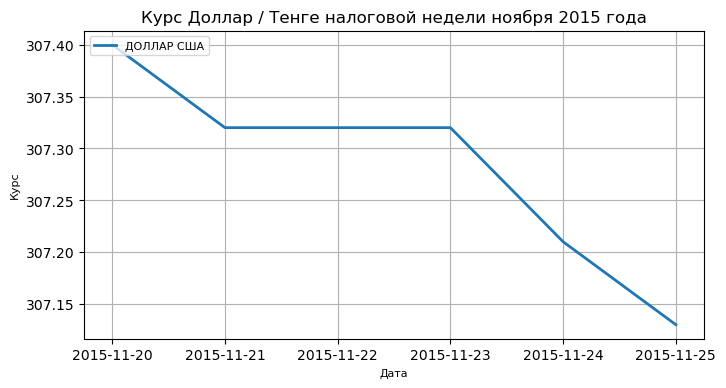

In [6]:
# ищем дни налоговой недели
tax_weeks_df = year_dict[2015][year_dict[2015]['День налоговой недели'] == 1]

# ищем ноябрь
tax_week_2015_11 = tax_weeks_df[tax_weeks_df['Дата'].dt.month == 11]
exchange_rates = tax_week_2015_11['ДОЛЛАР США'].tolist()

# строим график курса
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(tax_week_2015_11['Дата'], exchange_rates, linewidth=2, label='ДОЛЛАР США')
# добавляем сетку и подписи осей
ax.grid(True)
ax.set_xlabel('Дата', fontsize=8)
ax.set_ylabel('Курс', fontsize=8)
# добавляем легенду
ax.legend(loc='upper left', fontsize=8)
# задаем заголовок графика
plt.title('Курс Доллар / Тенге налоговой недели ноября 2015 года', fontsize=12)
# выводим график
plt.show()

In [7]:
tax_week_2015_11

,Unnamed: 0,Дата,ФУНТ СТЕРЛИНГОВ,ДИРХАМ ОАЭ,ДОЛЛАР США,ЕВРО,РОССИЙСКИЙ РУБЛЬ,ТУРЕЦКАЯ ЛИРА,"Размер ставки, %","Коридор базовой ставки, %",День налоговой недели,Год
79,79,2015-11-20,469.34,83.69,307.40,328.40,4.73,107.83,16.0,"15,0 - 17,0",1,2015
80,80,2015-11-21,469.34,83.67,307.32,328.25,4.73,108.13,16.0,"15,0 - 17,0",1,2015
81,81,2015-11-22,469.34,83.67,307.32,328.25,4.73,108.13,16.0,"15,0 - 17,0",1,2015
82,82,2015-11-23,469.34,83.67,307.32,328.25,4.73,108.13,16.0,"15,0 - 17,0",1,2015
83,83,2015-11-24,465.73,83.64,307.21,326.63,4.67,108.06,16.0,"15,0 - 17,0",1,2015
84,84,2015-11-25,464.29,83.62,307.13,327.34,4.67,106.94,16.0,"15,0 - 17,0",1,2015


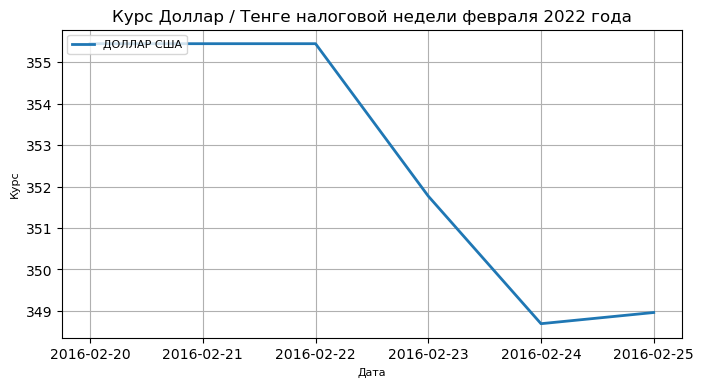

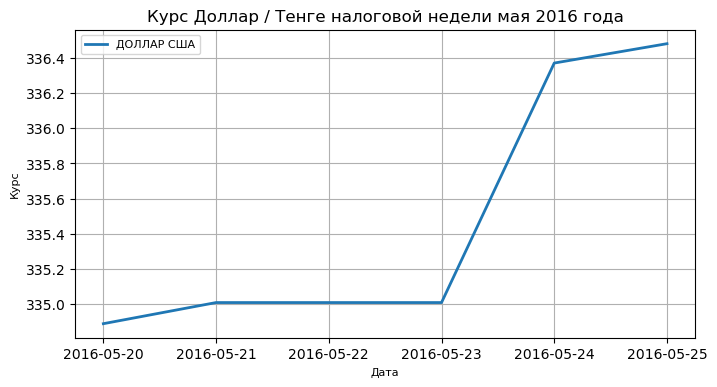

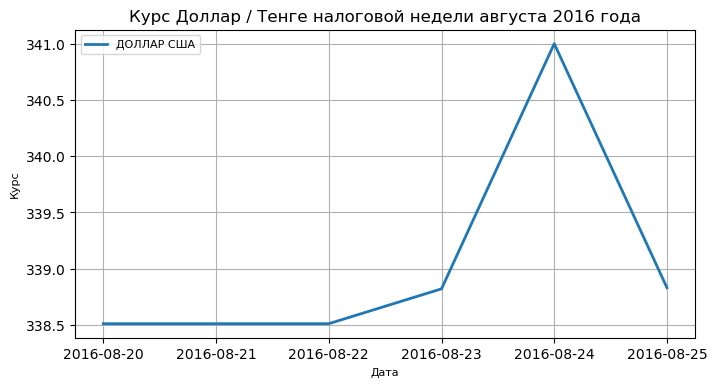

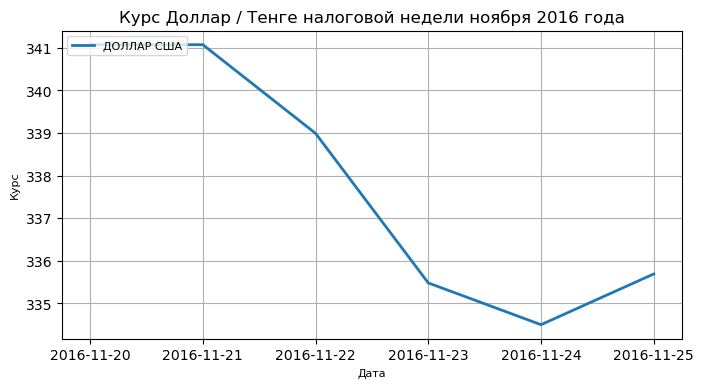

In [8]:
# ищем дни налоговой недели
tax_weeks_df = year_dict[2016][year_dict[2016]['День налоговой недели'] == 1]

# ищем февраль
tax_week_2016_02 = tax_weeks_df[tax_weeks_df['Дата'].dt.month == 2]
exchange_rates = tax_week_2016_02['ДОЛЛАР США'].tolist()

# строим график курса
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(tax_week_2016_02['Дата'], exchange_rates, linewidth=2, label='ДОЛЛАР США')
# добавляем сетку и подписи осей
ax.grid(True)
ax.set_xlabel('Дата', fontsize=8)
ax.set_ylabel('Курс', fontsize=8)
# добавляем легенду
ax.legend(loc='upper left', fontsize=8)
# задаем заголовок графика
plt.title('Курс Доллар / Тенге налоговой недели февраля 2022 года', fontsize=12)
# выводим график
plt.show()

# ищем май 
tax_week_2016_05 = tax_weeks_df[tax_weeks_df['Дата'].dt.month == 5]
exchange_rates = tax_week_2016_05['ДОЛЛАР США'].tolist()

# строим график курса
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(tax_week_2016_05['Дата'], exchange_rates, linewidth=2, label='ДОЛЛАР США')
# добавляем сетку и подписи осей
ax.grid(True)
ax.set_xlabel('Дата', fontsize=8)
ax.set_ylabel('Курс', fontsize=8)
# добавляем легенду
ax.legend(loc='upper left', fontsize=8)
# задаем заголовок графика
plt.title('Курс Доллар / Тенге налоговой недели мая 2016 года', fontsize=12)
# выводим график
plt.show()

# ищем август 
tax_week_2016_08 = tax_weeks_df[tax_weeks_df['Дата'].dt.month == 8]
exchange_rates = tax_week_2016_08['ДОЛЛАР США'].tolist()

# строим график курса
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(tax_week_2016_08['Дата'], exchange_rates, linewidth=2, label='ДОЛЛАР США')
# добавляем сетку и подписи осей
ax.grid(True)
ax.set_xlabel('Дата', fontsize=8)
ax.set_ylabel('Курс', fontsize=8)
# добавляем легенду
ax.legend(loc='upper left', fontsize=8)
# задаем заголовок графика
plt.title('Курс Доллар / Тенге налоговой недели августа 2016 года', fontsize=12)
# выводим график
plt.show()

# ищем ноябрь 
tax_week_2016_11 = tax_weeks_df[tax_weeks_df['Дата'].dt.month == 11]
exchange_rates = tax_week_2016_11['ДОЛЛАР США'].tolist()

# строим график курса
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(tax_week_2016_11['Дата'], exchange_rates, linewidth=2, label='ДОЛЛАР США')
# добавляем сетку и подписи осей
ax.grid(True)
ax.set_xlabel('Дата', fontsize=8)
ax.set_ylabel('Курс', fontsize=8)
# добавляем легенду
ax.legend(loc='upper left', fontsize=8)
# задаем заголовок графика
plt.title('Курс Доллар / Тенге налоговой недели ноября 2016 года', fontsize=12)
# выводим график
plt.show()

In [9]:
tax_week_2016_02

,Unnamed: 0,Дата,ФУНТ СТЕРЛИНГОВ,ДИРХАМ ОАЭ,ДОЛЛАР США,ЕВРО,РОССИЙСКИЙ РУБЛЬ,ТУРЕЦКАЯ ЛИРА,"Размер ставки, %","Коридор базовой ставки, %",День налоговой недели,Год
171,171,2016-02-20,507.90,96.78,355.45,393.80,4.65,119.80,17.0,"15,0 - 19,0",1,2016
172,172,2016-02-21,507.90,96.78,355.45,393.80,4.65,119.80,17.0,"15,0 - 19,0",1,2016
173,173,2016-02-22,507.90,96.78,355.45,393.80,4.65,119.80,17.0,"15,0 - 19,0",1,2016
174,174,2016-02-23,498.60,95.78,351.77,389.59,4.63,119.54,17.0,"15,0 - 19,0",1,2016
175,175,2016-02-24,492.39,94.95,348.69,383.66,4.60,118.76,17.0,"15,0 - 19,0",1,2016
176,176,2016-02-25,485.86,95.02,348.96,383.30,4.52,118.71,17.0,"15,0 - 19,0",1,2016


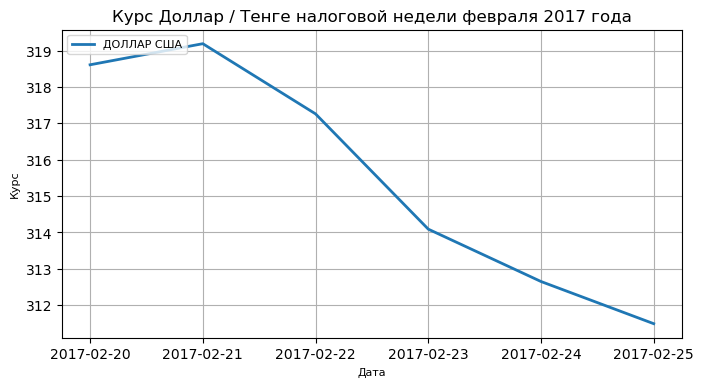

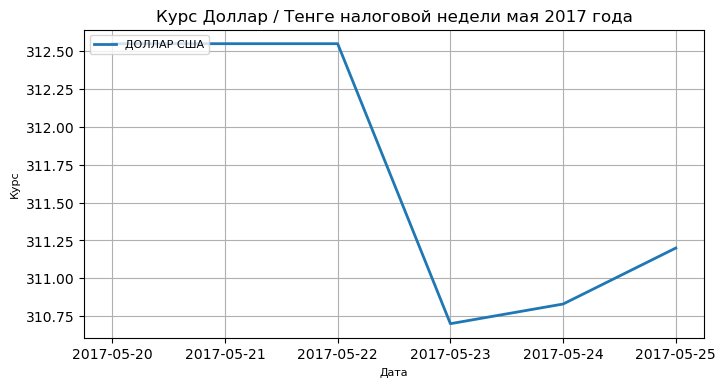

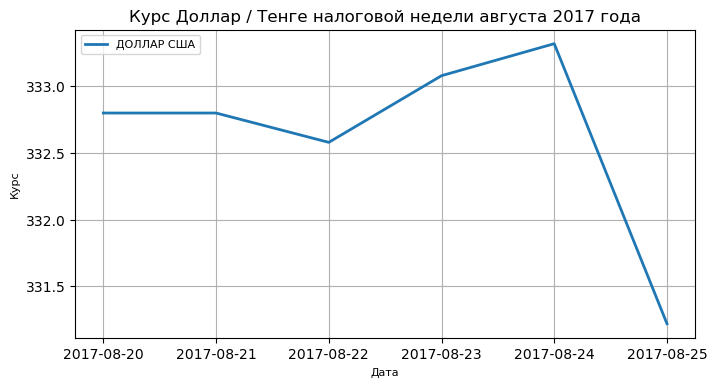

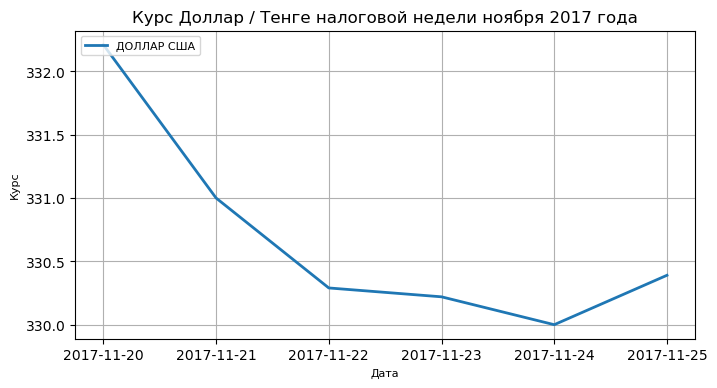

In [10]:
tax_weeks_df = year_dict[2017][year_dict[2017]['День налоговой недели'] == 1]

tax_week_2017_02 = tax_weeks_df[tax_weeks_df['Дата'].dt.month == 2]
exchange_rates = tax_week_2017_02['ДОЛЛАР США'].tolist()
fig, ax = plt.subplots(figsize=(8, 4))
# строим график курса 
ax.plot(tax_week_2017_02['Дата'], exchange_rates, linewidth=2, label='ДОЛЛАР США')
# добавляем сетку и подписи осей
ax.grid(True)
ax.set_xlabel('Дата', fontsize=8)
ax.set_ylabel('Курс', fontsize=8)
# добавляем легенду
ax.legend(loc='upper left', fontsize=8)
# задаем заголовок графика
plt.title('Курс Доллар / Тенге налоговой недели февраля 2017 года', fontsize=12)
# выводим график
plt.show()

#
tax_week_2017_05 = tax_weeks_df[tax_weeks_df['Дата'].dt.month == 5]
exchange_rates = tax_week_2017_05['ДОЛЛАР США'].tolist()
fig, ax = plt.subplots(figsize=(8, 4))
# строим график курса
ax.plot(tax_week_2017_05['Дата'], exchange_rates, linewidth=2, label='ДОЛЛАР США')
# добавляем сетку и подписи осей
ax.grid(True)
ax.set_xlabel('Дата', fontsize=8)
ax.set_ylabel('Курс', fontsize=8)
# добавляем легенду
ax.legend(loc='upper left', fontsize=8)
# задаем заголовок графика
plt.title('Курс Доллар / Тенге налоговой недели мая 2017 года', fontsize=12)
# выводим график
plt.show()


tax_week_2017_08 = tax_weeks_df[tax_weeks_df['Дата'].dt.month == 8]
exchange_rates = tax_week_2017_08['ДОЛЛАР США'].tolist()
fig, ax = plt.subplots(figsize=(8, 4))
# строим график курса
ax.plot(tax_week_2017_08['Дата'], exchange_rates, linewidth=2, label='ДОЛЛАР США')
# добавляем сетку и подписи осей
ax.grid(True)
ax.set_xlabel('Дата', fontsize=8)
ax.set_ylabel('Курс', fontsize=8)
# добавляем легенду
ax.legend(loc='upper left', fontsize=8)
# задаем заголовок графика
plt.title('Курс Доллар / Тенге налоговой недели августа 2017 года', fontsize=12)
# выводим график
plt.show()


tax_week_2017_11 = tax_weeks_df[tax_weeks_df['Дата'].dt.month == 11]
exchange_rates = tax_week_2017_11['ДОЛЛАР США'].tolist()
fig, ax = plt.subplots(figsize=(8, 4))
# строим график курса/
ax.plot(tax_week_2017_11['Дата'], exchange_rates, linewidth=2, label='ДОЛЛАР США')
# добавляем сетку и подписи осей
ax.grid(True)
ax.set_xlabel('Дата', fontsize=8)
ax.set_ylabel('Курс', fontsize=8)
# добавляем легенду
ax.legend(loc='upper left', fontsize=8)
# задаем заголовок графика
plt.title('Курс Доллар / Тенге налоговой недели ноября 2017 года', fontsize=12)
# выводим график
plt.show()

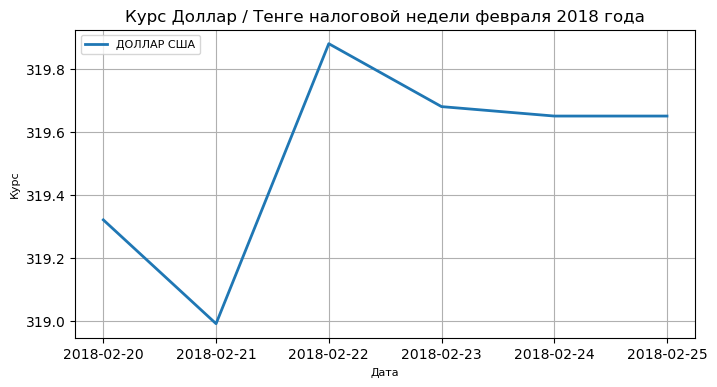

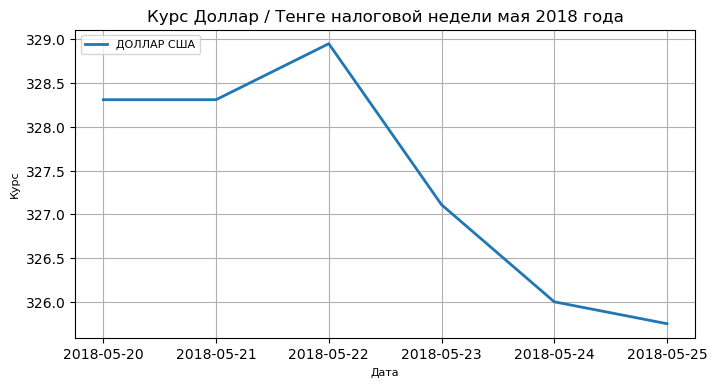

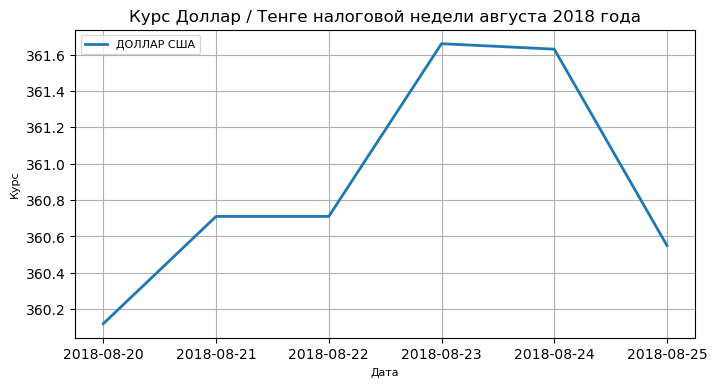

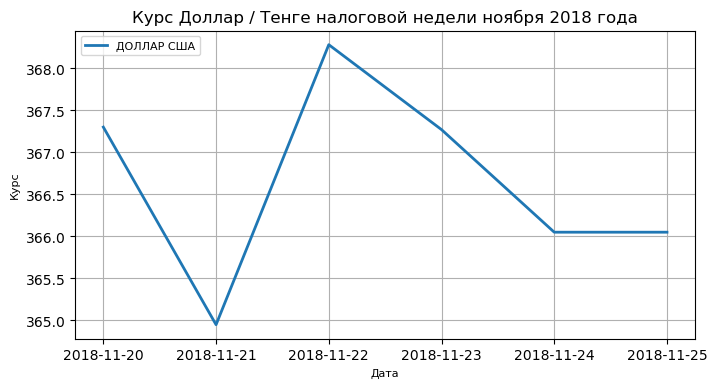

In [11]:
tax_weeks_df = year_dict[2018][year_dict[2018]['День налоговой недели'] == 1]

tax_week_2018_02 = tax_weeks_df[tax_weeks_df['Дата'].dt.month == 2]
exchange_rates = tax_week_2018_02['ДОЛЛАР США'].tolist()
fig, ax = plt.subplots(figsize=(8, 4))
# строим график курса 
ax.plot(tax_week_2018_02['Дата'], exchange_rates, linewidth=2, label='ДОЛЛАР США')
# добавляем сетку и подписи осей
ax.grid(True)
ax.set_xlabel('Дата', fontsize=8)
ax.set_ylabel('Курс', fontsize=8)
# добавляем легенду
ax.legend(loc='upper left', fontsize=8)
# задаем заголовок графика
plt.title('Курс Доллар / Тенге налоговой недели февраля 2018 года', fontsize=12)
# выводим график
plt.show()

tax_week_2018_05 = tax_weeks_df[tax_weeks_df['Дата'].dt.month == 5]
exchange_rates = tax_week_2018_05['ДОЛЛАР США'].tolist()
fig, ax = plt.subplots(figsize=(8, 4))
# строим график курса 
ax.plot(tax_week_2018_05['Дата'], exchange_rates, linewidth=2, label='ДОЛЛАР США')
# добавляем сетку и подписи осей
ax.grid(True)
ax.set_xlabel('Дата', fontsize=8)
ax.set_ylabel('Курс', fontsize=8)
# добавляем легенду
ax.legend(loc='upper left', fontsize=8)
# задаем заголовок графика
plt.title('Курс Доллар / Тенге налоговой недели мая 2018 года', fontsize=12)
# выводим график
plt.show()

tax_week_2018_08 = tax_weeks_df[tax_weeks_df['Дата'].dt.month == 8]
exchange_rates = tax_week_2018_08['ДОЛЛАР США'].tolist()
fig, ax = plt.subplots(figsize=(8, 4))
# строим график курса
ax.plot(tax_week_2018_08['Дата'], exchange_rates, linewidth=2, label='ДОЛЛАР США')
# добавляем сетку и подписи осей
ax.grid(True)
ax.set_xlabel('Дата', fontsize=8)
ax.set_ylabel('Курс', fontsize=8)
# добавляем легенду
ax.legend(loc='upper left', fontsize=8)
# задаем заголовок графика
plt.title('Курс Доллар / Тенге налоговой недели августа 2018 года', fontsize=12)
# выводим график
plt.show()

tax_week_2018_11 = tax_weeks_df[tax_weeks_df['Дата'].dt.month == 11]
exchange_rates = tax_week_2018_11['ДОЛЛАР США'].tolist()
fig, ax = plt.subplots(figsize=(8, 4))
# строим график курса
ax.plot(tax_week_2018_11['Дата'], exchange_rates, linewidth=2, label='ДОЛЛАР США')
# добавляем сетку и подписи осей
ax.grid(True)
ax.set_xlabel('Дата', fontsize=8)
ax.set_ylabel('Курс', fontsize=8)
# добавляем легенду
ax.legend(loc='upper left', fontsize=8)
# задаем заголовок графика
plt.title('Курс Доллар / Тенге налоговой недели ноября 2018 года', fontsize=12)
# выводим график
plt.show()

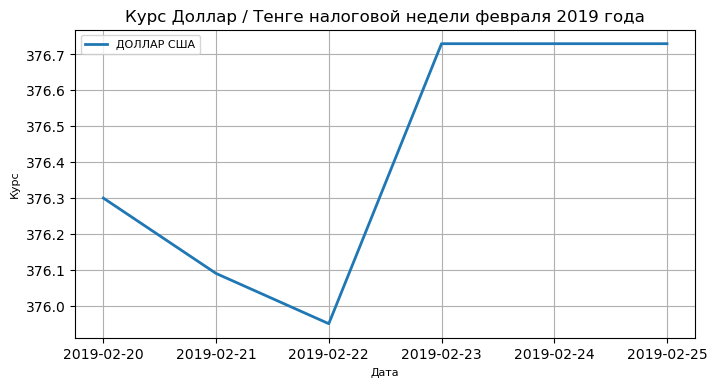

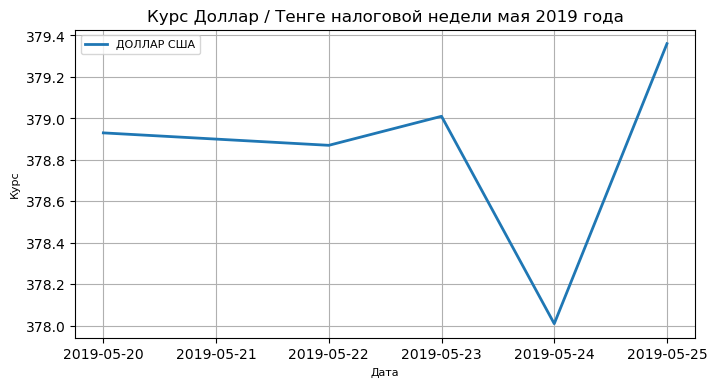

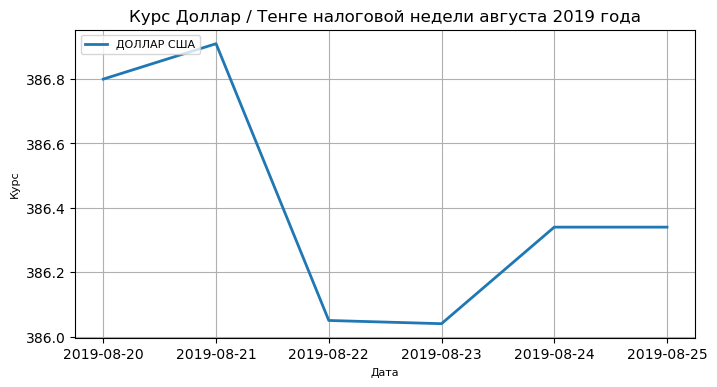

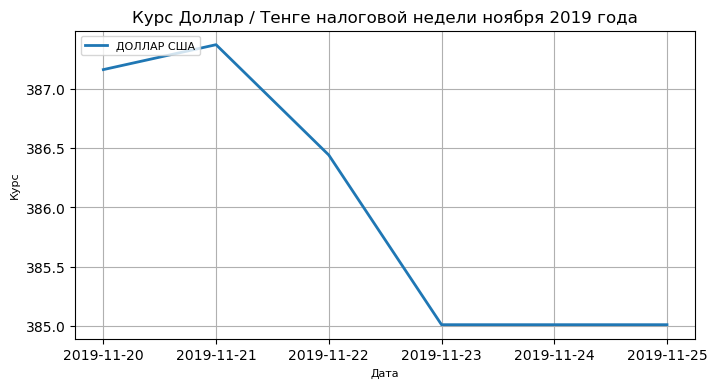

In [12]:
tax_weeks_df = year_dict[2019][year_dict[2019]['День налоговой недели'] == 1]

tax_week_2019_02 = tax_weeks_df[tax_weeks_df['Дата'].dt.month == 2]
exchange_rates = tax_week_2019_02['ДОЛЛАР США'].tolist()
fig, ax = plt.subplots(figsize=(8, 4))
# строим график курса
ax.plot(tax_week_2019_02['Дата'], exchange_rates, linewidth=2, label='ДОЛЛАР США')
# добавляем сетку и подписи осей
ax.grid(True)
ax.set_xlabel('Дата', fontsize=8)
ax.set_ylabel('Курс', fontsize=8)
# добавляем легенду
ax.legend(loc='upper left', fontsize=8)
# задаем заголовок графика
plt.title('Курс Доллар / Тенге налоговой недели февраля 2019 года', fontsize=12)
# выводим график
plt.show()

tax_week_2019_05 = tax_weeks_df[tax_weeks_df['Дата'].dt.month == 5]
exchange_rates = tax_week_2019_05['ДОЛЛАР США'].tolist()
fig, ax = plt.subplots(figsize=(8, 4))
# строим график курса рубля
ax.plot(tax_week_2019_05['Дата'], exchange_rates, linewidth=2, label='ДОЛЛАР США')
# добавляем сетку и подписи осей
ax.grid(True)
ax.set_xlabel('Дата', fontsize=8)
ax.set_ylabel('Курс', fontsize=8)
# добавляем легенду
ax.legend(loc='upper left', fontsize=8)
# задаем заголовок графика
plt.title('Курс Доллар / Тенге налоговой недели мая 2019 года', fontsize=12)
# выводим график
plt.show()

tax_week_2019_08 = tax_weeks_df[tax_weeks_df['Дата'].dt.month == 8]
exchange_rates = tax_week_2019_08['ДОЛЛАР США'].tolist()
fig, ax = plt.subplots(figsize=(8, 4))
# строим график курса
ax.plot(tax_week_2019_08['Дата'], exchange_rates, linewidth=2, label='ДОЛЛАР США')
# добавляем сетку и подписи осей
ax.grid(True)
ax.set_xlabel('Дата', fontsize=8)
ax.set_ylabel('Курс', fontsize=8)
# добавляем легенду
ax.legend(loc='upper left', fontsize=8)
# задаем заголовок графика
plt.title('Курс Доллар / Тенге налоговой недели августа 2019 года', fontsize=12)
# выводим график
plt.show()

tax_week_2019_11 = tax_weeks_df[tax_weeks_df['Дата'].dt.month == 11]
exchange_rates = tax_week_2019_11['ДОЛЛАР США'].tolist()
fig, ax = plt.subplots(figsize=(8, 4))
# строим график курса
ax.plot(tax_week_2019_11['Дата'], exchange_rates, linewidth=2, label='ДОЛЛАР США')
# добавляем сетку и подписи осей
ax.grid(True)
ax.set_xlabel('Дата', fontsize=8)
ax.set_ylabel('Курс', fontsize=8)
# добавляем легенду
ax.legend(loc='upper left', fontsize=8)
# задаем заголовок графика
plt.title('Курс Доллар / Тенге налоговой недели ноября 2019 года', fontsize=12)
# выводим график
plt.show()

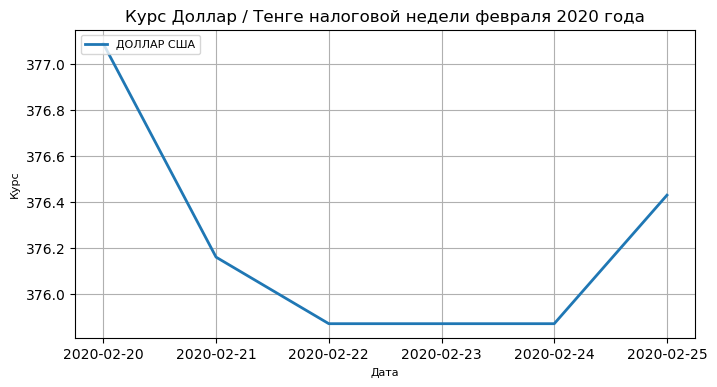

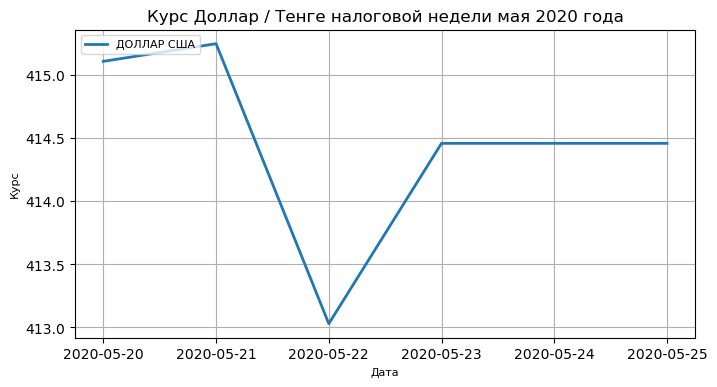

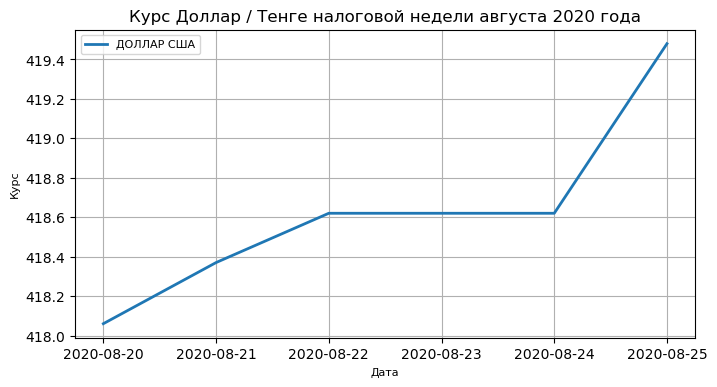

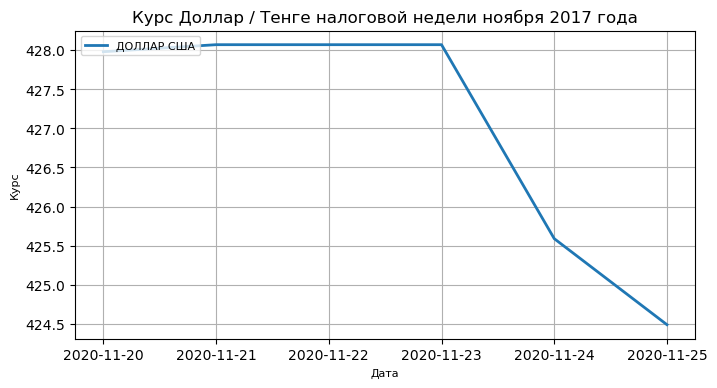

In [13]:
tax_weeks_df = year_dict[2020][year_dict[2020]['День налоговой недели'] == 1]

tax_week_2020_02 = tax_weeks_df[tax_weeks_df['Дата'].dt.month == 2]
exchange_rates = tax_week_2020_02['ДОЛЛАР США'].tolist()
fig, ax = plt.subplots(figsize=(8, 4))
# строим график курса 
ax.plot(tax_week_2020_02['Дата'], exchange_rates, linewidth=2, label='ДОЛЛАР США')
# добавляем сетку и подписи осей
ax.grid(True)
ax.set_xlabel('Дата', fontsize=8)
ax.set_ylabel('Курс', fontsize=8)
# добавляем легенду
ax.legend(loc='upper left', fontsize=8)
# задаем заголовок графика
plt.title('Курс Доллар / Тенге налоговой недели февраля 2020 года', fontsize=12)
# выводим график
plt.show()

tax_week_2020_05 = tax_weeks_df[tax_weeks_df['Дата'].dt.month == 5]
exchange_rates = tax_week_2020_05['ДОЛЛАР США'].tolist()
fig, ax = plt.subplots(figsize=(8, 4))
# строим график курса
ax.plot(tax_week_2020_05['Дата'], exchange_rates, linewidth=2, label='ДОЛЛАР США')
# добавляем сетку и подписи осей
ax.grid(True)
ax.set_xlabel('Дата', fontsize=8)
ax.set_ylabel('Курс', fontsize=8)
# добавляем легенду
ax.legend(loc='upper left', fontsize=8)
# задаем заголовок графика
plt.title('Курс Доллар / Тенге налоговой недели мая 2020 года', fontsize=12)
# выводим график
plt.show()

tax_week_2020_08 = tax_weeks_df[tax_weeks_df['Дата'].dt.month == 8]
exchange_rates = tax_week_2020_08['ДОЛЛАР США'].tolist()
fig, ax = plt.subplots(figsize=(8, 4))
# строим график курса 
ax.plot(tax_week_2020_08['Дата'], exchange_rates, linewidth=2, label='ДОЛЛАР США')
# добавляем сетку и подписи осей
ax.grid(True)
ax.set_xlabel('Дата', fontsize=8)
ax.set_ylabel('Курс', fontsize=8)
# добавляем легенду
ax.legend(loc='upper left', fontsize=8)
# задаем заголовок графика
plt.title('Курс Доллар / Тенге налоговой недели августа 2020 года', fontsize=12)
# выводим график
plt.show()

tax_week_2020_11 = tax_weeks_df[tax_weeks_df['Дата'].dt.month == 11]
exchange_rates = tax_week_2020_11['ДОЛЛАР США'].tolist()
fig, ax = plt.subplots(figsize=(8, 4))
# строим график курса 
ax.plot(tax_week_2020_11['Дата'], exchange_rates, linewidth=2, label='ДОЛЛАР США')
# добавляем сетку и подписи осей
ax.grid(True)
ax.set_xlabel('Дата', fontsize=8)
ax.set_ylabel('Курс', fontsize=8)
# добавляем легенду
ax.legend(loc='upper left', fontsize=8)
# задаем заголовок графика
plt.title('Курс Доллар / Тенге налоговой недели ноября 2017 года', fontsize=12)
# выводим график
plt.show()

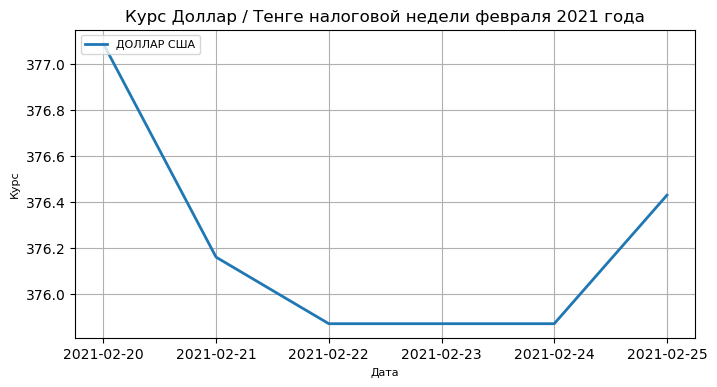

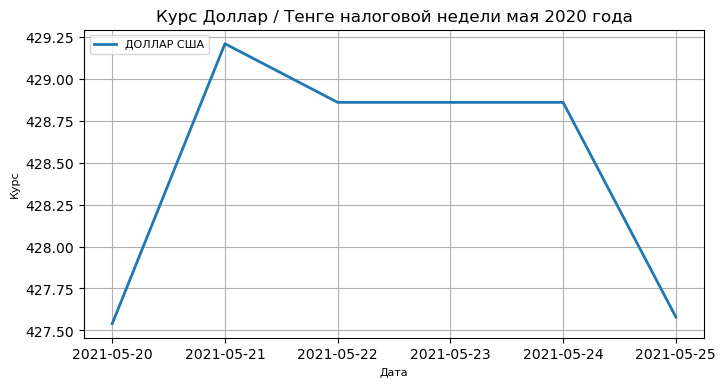

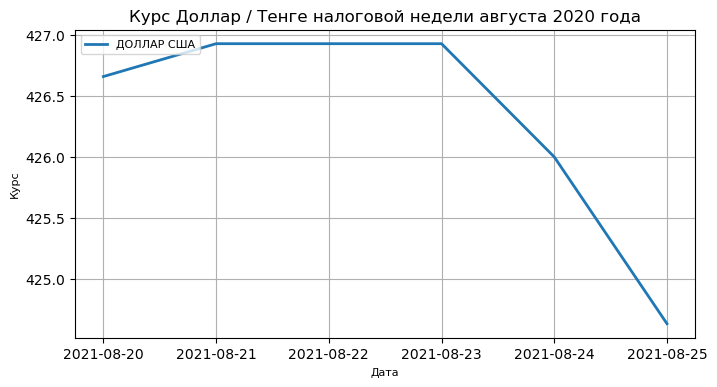

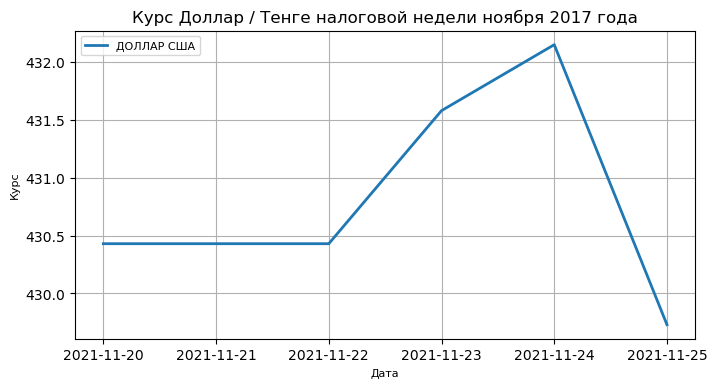

In [14]:
tax_weeks_df = year_dict[2021][year_dict[2021]['День налоговой недели'] == 1]

tax_week_2021_02 = tax_weeks_df[tax_weeks_df['Дата'].dt.month == 2]
exchange_rates = tax_week_2020_02['ДОЛЛАР США'].tolist()
fig, ax = plt.subplots(figsize=(8, 4))
# строим график курса 
ax.plot(tax_week_2021_02['Дата'], exchange_rates, linewidth=2, label='ДОЛЛАР США')
# добавляем сетку и подписи осей
ax.grid(True)
ax.set_xlabel('Дата', fontsize=8)
ax.set_ylabel('Курс', fontsize=8)
# добавляем легенду
ax.legend(loc='upper left', fontsize=8)
# задаем заголовок графика
plt.title('Курс Доллар / Тенге налоговой недели февраля 2021 года', fontsize=12)
# выводим график
plt.show()

tax_week_2021_05 = tax_weeks_df[tax_weeks_df['Дата'].dt.month == 5]
exchange_rates = tax_week_2021_05['ДОЛЛАР США'].tolist()
fig, ax = plt.subplots(figsize=(8, 4))
# строим график курса
ax.plot(tax_week_2021_05['Дата'], exchange_rates, linewidth=2, label='ДОЛЛАР США')
# добавляем сетку и подписи осей
ax.grid(True)
ax.set_xlabel('Дата', fontsize=8)
ax.set_ylabel('Курс', fontsize=8)
# добавляем легенду
ax.legend(loc='upper left', fontsize=8)
# задаем заголовок графика
plt.title('Курс Доллар / Тенге налоговой недели мая 2020 года', fontsize=12)
# выводим график
plt.show()

tax_week_2021_08 = tax_weeks_df[tax_weeks_df['Дата'].dt.month == 8]
exchange_rates = tax_week_2021_08['ДОЛЛАР США'].tolist()
fig, ax = plt.subplots(figsize=(8, 4))
# строим график курса 
ax.plot(tax_week_2021_08['Дата'], exchange_rates, linewidth=2, label='ДОЛЛАР США')
# добавляем сетку и подписи осей
ax.grid(True)
ax.set_xlabel('Дата', fontsize=8)
ax.set_ylabel('Курс', fontsize=8)
# добавляем легенду
ax.legend(loc='upper left', fontsize=8)
# задаем заголовок графика
plt.title('Курс Доллар / Тенге налоговой недели августа 2020 года', fontsize=12)
# выводим график
plt.show()

tax_week_2021_11 = tax_weeks_df[tax_weeks_df['Дата'].dt.month == 11]
exchange_rates = tax_week_2021_11['ДОЛЛАР США'].tolist()
fig, ax = plt.subplots(figsize=(8, 4))
# строим график курса 
ax.plot(tax_week_2021_11['Дата'], exchange_rates, linewidth=2, label='ДОЛЛАР США')
# добавляем сетку и подписи осей
ax.grid(True)
ax.set_xlabel('Дата', fontsize=8)
ax.set_ylabel('Курс', fontsize=8)
# добавляем легенду
ax.legend(loc='upper left', fontsize=8)
# задаем заголовок графика
plt.title('Курс Доллар / Тенге налоговой недели ноября 2017 года', fontsize=12)
# выводим график
plt.show()

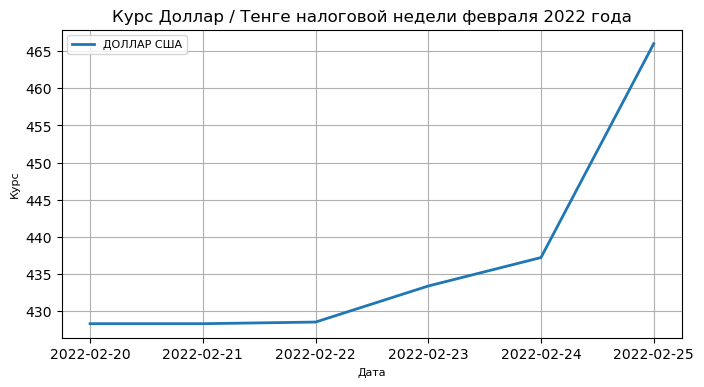

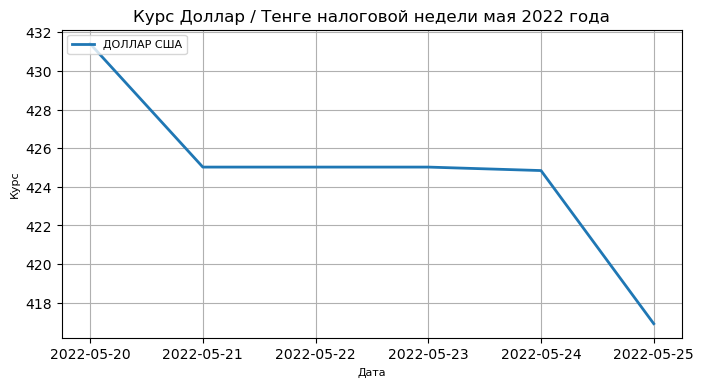

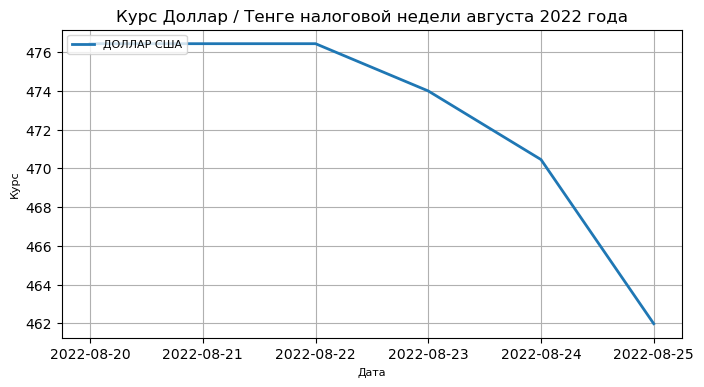

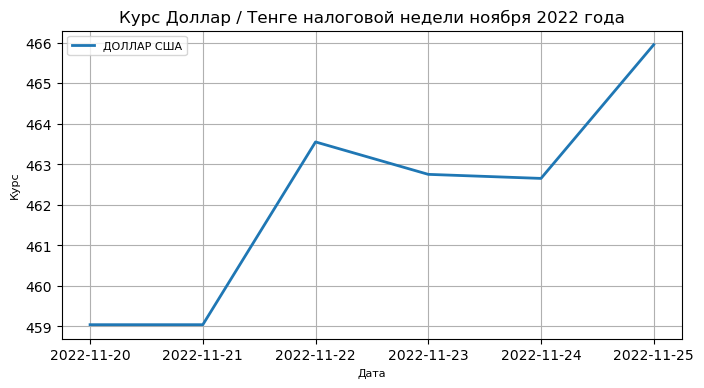

In [15]:
tax_weeks_df = year_dict[2022][year_dict[2022]['День налоговой недели'] == 1]

tax_week_2022_02 = tax_weeks_df[tax_weeks_df['Дата'].dt.month == 2]
exchange_rates = tax_week_2022_02['ДОЛЛАР США'].tolist()
fig, ax = plt.subplots(figsize=(8, 4))
# строим график курса
ax.plot(tax_week_2022_02['Дата'], exchange_rates, linewidth=2, label='ДОЛЛАР США')
# добавляем сетку и подписи осей
ax.grid(True)
ax.set_xlabel('Дата', fontsize=8)
ax.set_ylabel('Курс', fontsize=8)
# добавляем легенду
ax.legend(loc='upper left', fontsize=8)
# задаем заголовок графика
plt.title('Курс Доллар / Тенге налоговой недели февраля 2022 года', fontsize=12)
# выводим график
plt.show()

tax_week_2022_05 = tax_weeks_df[tax_weeks_df['Дата'].dt.month == 5]
exchange_rates = tax_week_2022_05['ДОЛЛАР США'].tolist()
fig, ax = plt.subplots(figsize=(8, 4))
# строим график курса
ax.plot(tax_week_2022_05['Дата'], exchange_rates, linewidth=2, label='ДОЛЛАР США')
# добавляем сетку и подписи осей
ax.grid(True)
ax.set_xlabel('Дата', fontsize=8)
ax.set_ylabel('Курс', fontsize=8)
# добавляем легенду
ax.legend(loc='upper left', fontsize=8)
# задаем заголовок графика
plt.title('Курс Доллар / Тенге налоговой недели мая 2022 года', fontsize=12)
# выводим график
plt.show()

tax_week_2022_08 = tax_weeks_df[tax_weeks_df['Дата'].dt.month == 8]
exchange_rates = tax_week_2022_08['ДОЛЛАР США'].tolist()
fig, ax = plt.subplots(figsize=(8, 4))
# строим график курса
ax.plot(tax_week_2022_08['Дата'], exchange_rates, linewidth=2, label='ДОЛЛАР США')
# добавляем сетку и подписи осей
ax.grid(True)
ax.set_xlabel('Дата', fontsize=8)
ax.set_ylabel('Курс', fontsize=8)
# добавляем легенду
ax.legend(loc='upper left', fontsize=8)
# задаем заголовок графика
plt.title('Курс Доллар / Тенге налоговой недели августа 2022 года', fontsize=12)
# выводим график
plt.show()

tax_week_2022_11 = tax_weeks_df[tax_weeks_df['Дата'].dt.month == 11]
exchange_rates = tax_week_2022_11['ДОЛЛАР США'].tolist()
fig, ax = plt.subplots(figsize=(8, 4))
# строим график курса
ax.plot(tax_week_2022_11['Дата'], exchange_rates, linewidth=2, label='ДОЛЛАР США')
# добавляем сетку и подписи осей
ax.grid(True)
ax.set_xlabel('Дата', fontsize=8)
ax.set_ylabel('Курс', fontsize=8)
# добавляем легенду
ax.legend(loc='upper left', fontsize=8)
# задаем заголовок графика
plt.title('Курс Доллар / Тенге налоговой недели ноября 2022 года', fontsize=12)
# выводим график
plt.show()

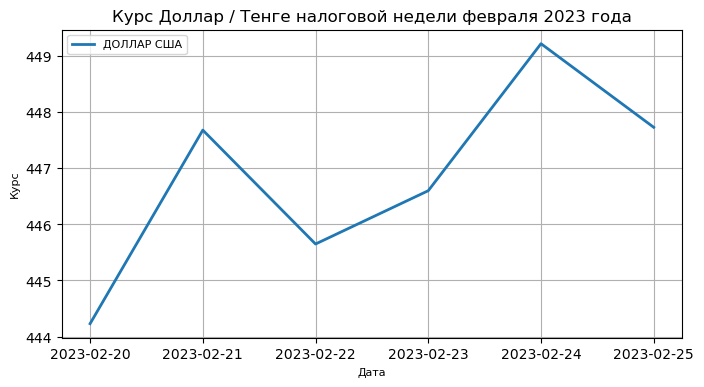

In [16]:
tax_weeks_df = year_dict[2023][year_dict[2023]['День налоговой недели'] == 1]

tax_week_2023_02 = tax_weeks_df[tax_weeks_df['Дата'].dt.month == 2]
exchange_rates = tax_week_2023_02['ДОЛЛАР США'].tolist()
fig, ax = plt.subplots(figsize=(8, 4))
# строим график курса
ax.plot(tax_week_2023_02['Дата'], exchange_rates, linewidth=2, label='ДОЛЛАР США')
# добавляем сетку и подписи осей
ax.grid(True)
ax.set_xlabel('Дата', fontsize=8)
ax.set_ylabel('Курс', fontsize=8)
# добавляем легенду
ax.legend(loc='upper left', fontsize=8)
# задаем заголовок графика
plt.title('Курс Доллар / Тенге налоговой недели февраля 2023 года', fontsize=12)
# выводим график
plt.show()

In [17]:
tax_week_2023_02

,Unnamed: 0,Дата,ФУНТ СТЕРЛИНГОВ,ДИРХАМ ОАЭ,ДОЛЛАР США,ЕВРО,РОССИЙСКИЙ РУБЛЬ,ТУРЕЦКАЯ ЛИРА,"Размер ставки, %","Коридор базовой ставки, %",День налоговой недели,Год
2728,2728,2023-02-20,530.46,120.95,444.23,472.48,5.96,23.55,16.75,"15,75-17,75",1,2023
2729,2729,2023-02-21,538.11,121.89,447.68,478.03,6.05,23.73,16.75,"15,75-17,75",1,2023
2730,2730,2023-02-22,538.79,121.33,445.65,475.20,5.98,23.63,16.75,"15,75-17,75",1,2023
2731,2731,2023-02-23,539.31,121.60,446.60,475.00,5.96,23.66,16.75,"15,75-17,75",1,2023
2732,2732,2023-02-24,540.32,122.31,449.22,475.68,5.99,23.80,16.75,"15,75-17,75",1,2023
2733,2733,2023-02-25,538.31,121.90,447.73,473.88,5.93,23.71,16.75,"15,75-17,75",1,2023


### Признак 2

В какие дни выгоднее всего покупать или сдавать валюту? В интернете есть мнение, в которых говорится, что наиболее активными днями на валютном рынке являются понедельник и вторник. Именно в начале недели чаще всего бывает максимальный курс, по которому выгоднее продавать валюту. Ближе к концу недели курс, чаще всего, снижается. Будет ли это работать в нашем случае?

##### Рассмотрим каждый год отдельно

#### 2015 год

In [18]:
import warnings

# Отключение всех предупреждений
warnings.filterwarnings("ignore")

In [19]:
# Группировка по неделям и поиск наименьшего и наибольшего значения курса
year_dict[2015]['Неделя'] = year_dict[2015]['Дата'].dt.isocalendar().week
weekly_stats_2015 = year_dict[2015].groupby('Неделя')['ДОЛЛАР США'].agg(['min', 'max'])

# Определение дня недели с наименьшим и наибольшим значением курса
year_dict[2015]['День недели'] = year_dict[2015]['Дата'].dt.day_name()
weekly_stats_2015['Наименьший курс день'] = year_dict[2015].loc[year_dict[2015].groupby('Неделя')['ДОЛЛАР США'].idxmin(), 'День недели'].values
weekly_stats_2015['Наибольший курс день'] = year_dict[2015].loc[year_dict[2015].groupby('Неделя')['ДОЛЛАР США'].idxmax(), 'День недели'].values

print(weekly_stats_2015)

           min     max Наименьший курс день Наибольший курс день
Неделя                                                          
36      234.94  241.15            Wednesday             Thursday
37      239.60  253.00               Monday               Friday
38      252.14  283.98               Monday             Thursday
39      264.12  270.69             Thursday               Monday
40      269.81  271.05               Monday             Saturday
41      271.05  274.41               Monday             Saturday
42      274.41  277.05               Monday               Friday
43      276.10  278.21               Monday               Friday
44      277.51  279.21               Monday             Thursday
45      279.18  307.53               Monday             Saturday
46      306.57  312.65               Friday              Tuesday
47      307.32  308.36             Saturday              Tuesday
48      307.08  307.32             Thursday               Monday
49      307.08  307.93   

In [20]:
frequency_counts_min_2015 = weekly_stats_2015['Наименьший курс день'].value_counts()
frequency_counts_max_2015 = weekly_stats_2015['Наибольший курс день'].value_counts()

print(frequency_counts_min_2015)
print('-----------------------')
print(frequency_counts_max_2015)

Наименьший курс день
Monday       10
Thursday      2
Friday        2
Saturday      2
Wednesday     1
Tuesday       1
Name: count, dtype: int64
-----------------------
Наибольший курс день
Saturday    5
Thursday    4
Friday      4
Tuesday     3
Monday      2
Name: count, dtype: int64


#### 2016 год

In [21]:
# Группировка по неделям и поиск наименьшего и наибольшего значения курса
year_dict[2016]['Неделя'] = year_dict[2016]['Дата'].dt.isocalendar().week
weekly_stats_2016 = year_dict[2016].groupby('Неделя')['ДОЛЛАР США'].agg(['min', 'max'])

# Определение дня недели с наименьшим и наибольшим значением курса
year_dict[2016]['День недели'] = year_dict[2016]['Дата'].dt.day_name()
weekly_stats_2016['Наименьший курс день'] = year_dict[2016].loc[year_dict[2016].groupby('Неделя')['ДОЛЛАР США'].idxmin(), 'День недели'].values
weekly_stats_2016['Наибольший курс день'] = year_dict[2016].loc[year_dict[2016].groupby('Неделя')['ДОЛЛАР США'].idxmax(), 'День недели'].values

print(weekly_stats_2016.head())

           min     max Наименьший курс день Наибольший курс день
Неделя                                                          
1       340.01  351.85               Monday             Saturday
2       351.85  366.54               Monday             Thursday
3       362.67  383.23               Monday               Friday
4       365.23  379.86             Saturday               Monday
5       360.45  375.25              Tuesday             Thursday


In [22]:
frequency_counts_min_2016 = weekly_stats_2016['Наименьший курс день'].value_counts()
frequency_counts_max_2016 = weekly_stats_2016['Наибольший курс день'].value_counts()

print(frequency_counts_min_2016)
print('-----------------------')
print(frequency_counts_max_2016)

Наименьший курс день
Saturday     15
Monday       13
Friday        9
Wednesday     7
Tuesday       5
Thursday      3
Sunday        1
Name: count, dtype: int64
-----------------------
Наибольший курс день
Monday       18
Saturday      9
Thursday      9
Friday        9
Wednesday     5
Tuesday       3
Name: count, dtype: int64


#### 2017 год

In [23]:
# Группировка по неделям и поиск наименьшего и наибольшего значения курса
year_dict[2017]['Неделя'] = year_dict[2017]['Дата'].dt.isocalendar().week
weekly_stats_2017 = year_dict[2017].groupby('Неделя')['ДОЛЛАР США'].agg(['min', 'max'])

# Определение дня недели с наименьшим и наибольшим значением курса
year_dict[2017]['День недели'] = year_dict[2017]['Дата'].dt.day_name()
weekly_stats_2017['Наименьший курс день'] = year_dict[2017].loc[year_dict[2017].groupby('Неделя')['ДОЛЛАР США'].idxmin(), 'День недели'].values
weekly_stats_2017['Наибольший курс день'] = year_dict[2017].loc[year_dict[2017].groupby('Неделя')['ДОЛЛАР США'].idxmax(), 'День недели'].values

print(weekly_stats_2017.head())

           min     max Наименьший курс день Наибольший курс день
Неделя                                                          
1       330.67  334.51             Saturday             Thursday
2       330.54  333.96              Tuesday             Thursday
3       330.55  333.25             Thursday              Tuesday
4       327.86  331.87             Thursday               Monday
5       322.92  328.73             Saturday               Monday


In [24]:
frequency_counts_min_2017 = weekly_stats_2017['Наименьший курс день'].value_counts()
frequency_counts_max_2017 = weekly_stats_2017['Наибольший курс день'].value_counts()

print(frequency_counts_min_2017)
print('-----------------------')
print(frequency_counts_max_2017)

Наименьший курс день
Monday       15
Saturday     14
Tuesday       8
Thursday      5
Wednesday     5
Friday        4
Sunday        1
Name: count, dtype: int64
-----------------------
Наибольший курс день
Thursday     14
Monday       13
Saturday     10
Tuesday       7
Friday        6
Wednesday     2
Name: count, dtype: int64


#### 2018 год

In [25]:
# Группировка по неделям и поиск наименьшего и наибольшего значения курса
year_dict[2018]['Неделя'] = year_dict[2018]['Дата'].dt.isocalendar().week
weekly_stats_2018 = year_dict[2018].groupby('Неделя')['ДОЛЛАР США'].agg(['min', 'max'])

# Определение дня недели с наименьшим и наибольшим значением курса
year_dict[2018]['День недели'] = year_dict[2018]['Дата'].dt.day_name()
weekly_stats_2018['Наименьший курс день'] = year_dict[2018].loc[year_dict[2018].groupby('Неделя')['ДОЛЛАР США'].idxmin(), 'День недели'].values
weekly_stats_2018['Наибольший курс день'] = year_dict[2018].loc[year_dict[2018].groupby('Неделя')['ДОЛЛАР США'].idxmax(), 'День недели'].values

print(weekly_stats_2018.head())

           min     max Наименьший курс день Наибольший курс день
Неделя                                                          
1       330.13  384.20             Saturday               Monday
2       329.67  330.61             Saturday               Friday
3       324.27  329.67             Saturday               Monday
4       319.83  324.65               Friday              Tuesday
5       320.66  322.90               Monday             Thursday


In [26]:
frequency_counts_min_2018 = weekly_stats_2018['Наименьший курс день'].value_counts()
frequency_counts_max_2018 = weekly_stats_2018['Наибольший курс день'].value_counts()

print(frequency_counts_min_2018)
print('-----------------------')
print(frequency_counts_max_2018)

Наименьший курс день
Monday       17
Wednesday    12
Saturday      9
Friday        5
Tuesday       4
Thursday      4
Sunday        1
Name: count, dtype: int64
-----------------------
Наибольший курс день
Saturday     16
Monday       11
Thursday     10
Friday        7
Wednesday     4
Tuesday       3
Sunday        1
Name: count, dtype: int64


#### 2019 год

In [27]:
# Группировка по неделям и поиск наименьшего и наибольшего значения курса
year_dict[2019]['Неделя'] = year_dict[2019]['Дата'].dt.isocalendar().week
weekly_stats_2019 = year_dict[2019].groupby('Неделя')['ДОЛЛАР США'].agg(['min', 'max'])

# Определение дня недели с наименьшим и наибольшим значением курса
year_dict[2019]['День недели'] = year_dict[2019]['Дата'].dt.day_name()
weekly_stats_2019['Наименьший курс день'] = year_dict[2019].loc[year_dict[2019].groupby('Неделя')['ДОЛЛАР США'].idxmin(), 'День недели'].values
weekly_stats_2019['Наибольший курс день'] = year_dict[2019].loc[year_dict[2019].groupby('Неделя')['ДОЛЛАР США'].idxmax(), 'День недели'].values

print(weekly_stats_2019.head())

           min     max Наименьший курс день Наибольший курс день
Неделя                                                          
1       378.12  384.20             Saturday              Tuesday
2       373.66  378.12            Wednesday               Monday
3       376.06  378.66               Monday             Saturday
4       377.46  378.78             Saturday              Tuesday
5       377.46  382.74               Monday             Saturday


In [28]:
frequency_counts_min_2019 = weekly_stats_2019['Наименьший курс день'].value_counts()
frequency_counts_max_2019 = weekly_stats_2019['Наибольший курс день'].value_counts()

print(frequency_counts_min_2019)
print('-----------------------')
print(frequency_counts_max_2019)

Наименьший курс день
Monday       15
Saturday     10
Friday        9
Wednesday     6
Tuesday       6
Thursday      5
Sunday        1
Name: count, dtype: int64
-----------------------
Наибольший курс день
Monday       13
Saturday     13
Friday        9
Wednesday     6
Thursday      6
Tuesday       5
Name: count, dtype: int64


#### 2020 год

In [29]:
# Группировка по неделям и поиск наименьшего и наибольшего значения курса
year_dict[2020]['Неделя'] = year_dict[2020]['Дата'].dt.isocalendar().week
weekly_stats_2020 = year_dict[2020].groupby('Неделя')['ДОЛЛАР США'].agg(['min', 'max'])

# Определение дня недели с наименьшим и наибольшим значением курса
year_dict[2020]['День недели'] = year_dict[2020]['Дата'].dt.day_name()
weekly_stats_2020['Наименьший курс день'] = year_dict[2020].loc[year_dict[2020].groupby('Неделя')['ДОЛЛАР США'].idxmin(), 'День недели'].values
weekly_stats_2020['Наибольший курс день'] = year_dict[2020].loc[year_dict[2020].groupby('Неделя')['ДОЛЛАР США'].idxmax(), 'День недели'].values

print(weekly_stats_2020.head())

           min     max Наименьший курс день Наибольший курс день
Неделя                                                          
1       382.59  382.59            Wednesday            Wednesday
2       376.50  382.14               Friday               Monday
3       376.51  379.70             Saturday             Thursday
4       375.91  378.60              Tuesday             Saturday
5       378.60  380.84               Monday            Wednesday


In [30]:
frequency_counts_min_2020 = weekly_stats_2020['Наименьший курс день'].value_counts()
frequency_counts_max_2020 = weekly_stats_2020['Наибольший курс день'].value_counts()

print(frequency_counts_min_2020)
print('-----------------------')
print(frequency_counts_max_2020)

Наименьший курс день
Monday       17
Saturday     10
Thursday     10
Friday        7
Tuesday       5
Wednesday     4
Name: count, dtype: int64
-----------------------
Наибольший курс день
Monday       13
Saturday     12
Thursday      8
Tuesday       8
Wednesday     7
Friday        5
Name: count, dtype: int64


#### 2021

In [31]:
# Группировка по неделям и поиск наименьшего и наибольшего значения курса
year_dict[2021]['Неделя'] = year_dict[2021]['Дата'].dt.isocalendar().week
weekly_stats_2021 = year_dict[2021].groupby('Неделя')['ДОЛЛАР США'].agg(['min', 'max'])

# Определение дня недели с наименьшим и наибольшим значением курса
year_dict[2021]['День недели'] = year_dict[2021]['Дата'].dt.day_name()
weekly_stats_2021['Наименьший курс день'] = year_dict[2021].loc[year_dict[2021].groupby('Неделя')['ДОЛЛАР США'].idxmin(), 'День недели'].values
weekly_stats_2021['Наибольший курс день'] = year_dict[2021].loc[year_dict[2021].groupby('Неделя')['ДОЛЛАР США'].idxmax(), 'День недели'].values

print(weekly_stats_2021.head())

           min     max Наименьший курс день Наибольший курс день
Неделя                                                          
1       418.94  420.91             Thursday               Monday
2       418.96  420.30               Monday            Wednesday
3       418.41  420.32               Friday            Wednesday
4       419.69  424.22               Monday             Saturday
5       420.49  424.22             Saturday               Monday


In [32]:
frequency_counts_min_2021 = weekly_stats_2021['Наименьший курс день'].value_counts()
frequency_counts_max_2021 = weekly_stats_2021['Наибольший курс день'].value_counts()

print(frequency_counts_min_2021)
print('-----------------------')
print(frequency_counts_max_2021)

Наименьший курс день
Monday       11
Wednesday    11
Friday       10
Thursday      9
Saturday      6
Tuesday       5
Sunday        1
Name: count, dtype: int64
-----------------------
Наибольший курс день
Monday       17
Saturday     12
Friday        9
Wednesday     7
Thursday      5
Tuesday       3
Name: count, dtype: int64


#### 2022 год

In [33]:
# Группировка по неделям и поиск наименьшего и наибольшего значения курса
year_dict[2022]['Неделя'] = year_dict[2022]['Дата'].dt.isocalendar().week
weekly_stats_2022 = year_dict[2022].groupby('Неделя')['ДОЛЛАР США'].agg(['min', 'max'])

# Определение дня недели с наименьшим и наибольшим значением курса
year_dict[2022]['День недели'] = year_dict[2022]['Дата'].dt.day_name()
weekly_stats_2022['Наименьший курс день'] = year_dict[2022].loc[year_dict[2022].groupby('Неделя')['ДОЛЛАР США'].idxmin(), 'День недели'].values
weekly_stats_2022['Наибольший курс день'] = year_dict[2022].loc[year_dict[2022].groupby('Неделя')['ДОЛЛАР США'].idxmax(), 'День недели'].values

print(weekly_stats_2022.head())

           min     max Наименьший курс день Наибольший курс день
Неделя                                                          
1       431.80  431.81               Monday             Thursday
2       431.81  434.84               Monday             Saturday
3       434.07  435.10            Wednesday             Saturday
4       433.83  435.20             Saturday            Wednesday
5       432.93  434.29             Saturday               Friday


In [34]:
frequency_counts_min_2022 = weekly_stats_2022['Наименьший курс день'].value_counts()
frequency_counts_max_2022 = weekly_stats_2022['Наибольший курс день'].value_counts()

print(frequency_counts_min_2022)
print('-----------------------')
print(frequency_counts_max_2022)

Наименьший курс день
Monday       15
Saturday     13
Wednesday     7
Friday        6
Thursday      6
Tuesday       5
Name: count, dtype: int64
-----------------------
Наибольший курс день
Monday       15
Saturday     14
Friday        7
Wednesday     6
Tuesday       5
Thursday      4
Sunday        1
Name: count, dtype: int64


#### 2023 год

In [35]:
# Группировка по неделям и поиск наименьшего и наибольшего значения курса
year_dict[2023]['Неделя'] = year_dict[2023]['Дата'].dt.isocalendar().week
weekly_stats_2023 = year_dict[2023].groupby('Неделя')['ДОЛЛАР США'].agg(['min', 'max'])

# Определение дня недели с наименьшим и наибольшим значением курса
year_dict[2023]['День недели'] = year_dict[2023]['Дата'].dt.day_name()
weekly_stats_2023['Наименьший курс день'] = year_dict[2023].loc[year_dict[2023].groupby('Неделя')['ДОЛЛАР США'].idxmin(), 'День недели'].values
weekly_stats_2023['Наибольший курс день'] = year_dict[2023].loc[year_dict[2023].groupby('Неделя')['ДОЛЛАР США'].idxmax(), 'День недели'].values

print(weekly_stats_2023.head())

           min     max Наименьший курс день Наибольший курс день
Неделя                                                          
1       462.65  465.93               Monday               Friday
2       461.84  463.31            Wednesday               Monday
3       462.29  464.34               Monday             Thursday
4       460.43  462.55             Saturday               Monday
5       458.69  460.87             Saturday             Thursday


In [36]:
frequency_counts_min_2023 = weekly_stats_2023['Наименьший курс день'].value_counts()
frequency_counts_max_2023 = weekly_stats_2023['Наибольший курс день'].value_counts()

print(frequency_counts_min_2023)
print('-----------------------')
print(frequency_counts_max_2023)

Наименьший курс день
Saturday     7
Monday       6
Friday       2
Tuesday      2
Wednesday    1
Thursday     1
Sunday       1
Name: count, dtype: int64
-----------------------
Наибольший курс день
Monday      7
Tuesday     4
Friday      3
Thursday    3
Saturday    2
Sunday      1
Name: count, dtype: int64


## Проверка гипотез

### Гипотезы про курс в период платежей

In [37]:
merged_weekly_stats = pd.concat([tax_week_2015_11, tax_week_2016_02, tax_week_2016_05, tax_week_2016_08, tax_week_2016_11, tax_week_2017_02, tax_week_2016_05, tax_week_2016_08, tax_week_2016_11, tax_week_2017_02, tax_week_2017_05, tax_week_2017_08, tax_week_2017_11, tax_week_2018_02, tax_week_2018_05, tax_week_2018_08, tax_week_2018_11, tax_week_2019_02, tax_week_2019_05, tax_week_2019_08, tax_week_2019_11, tax_week_2020_02, tax_week_2020_05, tax_week_2020_08, tax_week_2020_11, tax_week_2021_02, tax_week_2021_05, tax_week_2021_08, tax_week_2021_11, tax_week_2022_02, tax_week_2022_05, tax_week_2022_08, tax_week_2022_11, tax_week_2023_02])

In [38]:
merged_weekly_stats.head()

,Unnamed: 0,Дата,ФУНТ СТЕРЛИНГОВ,ДИРХАМ ОАЭ,ДОЛЛАР США,ЕВРО,РОССИЙСКИЙ РУБЛЬ,ТУРЕЦКАЯ ЛИРА,"Размер ставки, %","Коридор базовой ставки, %",День налоговой недели,Год
79,79,2015-11-20,469.34,83.69,307.40,328.40,4.73,107.83,16.0,"15,0 - 17,0",1,2015
80,80,2015-11-21,469.34,83.67,307.32,328.25,4.73,108.13,16.0,"15,0 - 17,0",1,2015
81,81,2015-11-22,469.34,83.67,307.32,328.25,4.73,108.13,16.0,"15,0 - 17,0",1,2015
82,82,2015-11-23,469.34,83.67,307.32,328.25,4.73,108.13,16.0,"15,0 - 17,0",1,2015
83,83,2015-11-24,465.73,83.64,307.21,326.63,4.67,108.06,16.0,"15,0 - 17,0",1,2015


* H0: в период платежей – средний курс в 20-ых числах меньше, чем в 25-ые числа

In [61]:
import scipy.stats as stats

sample_20 = merged_weekly_stats[merged_weekly_stats['Дата'].dt.day == 20]['ДОЛЛАР США']
sample_25 = merged_weekly_stats[merged_weekly_stats['Дата'].dt.day == 25]['ДОЛЛАР США']
# Null hypothesis: Среднее значение в 20 числа не больше, чем в 25 числа
# Alternative hypothesis: Среднее значение в 20 числа больше, чем в 25 числа

# Выполняем парный t-тест
t_statistic, p_value = stats.ttest_rel(sample_20, sample_25, alternative='greater')

print('p-значение:', p_value)

alpha = 0.05

if p_value < alpha:
    print("Нет оснований отвергать гипотезу: значение доллара США в 20 числах больше, чем в 25 числах")
else:
    print("Гипотеза отвергается: Среднее значение в 20 числа не больше, чем в 25 числа.")

p-значение: 0.2853694537022756
Гипотеза отвергается: Среднее значение в 20 числа не больше, чем в 25 числа.


* H0: в период платежей – средний курс в 20 и 21 числах меньше, чем в 24 и 25 числа

In [62]:
# Создание выборок данных
sample_20_21 = merged_weekly_stats[(merged_weekly_stats['Дата'].dt.day.isin([20, 21]))]['ДОЛЛАР США']
sample_24_25 = merged_weekly_stats[(merged_weekly_stats['Дата'].dt.day.isin([24, 25]))]['ДОЛЛАР США']

# Выполнение парного t-теста
t_statistic, p_value = stats.ttest_rel(sample_20_21, sample_24_25, alternative='greater')

print('p-значение:', p_value)

alpha = 0.05 
if p_value < alpha:
    print('Нет оснований отвергать гипотезу: значение доллара США в 20 и 21 числах больше, чем в 24 и 25 числах')
else:
    print('Гипотеза отвергается: значение доллара США в 20 и 21 числах не больше, чем в 24 и 25 числах')

p-значение: 0.13496048154375032
Гипотеза отвергается: значение доллара США в 20 и 21 числах не больше, чем в 24 и 25 числах


### Гипотезы про лучший день для покупки/продажи валюты 
* H0: в понедельник курс наибольший

In [65]:
merged_df = pd.concat([weekly_stats_2023, weekly_stats_2022, weekly_stats_2021, weekly_stats_2020, weekly_stats_2019, weekly_stats_2018, weekly_stats_2017, weekly_stats_2016, weekly_stats_2015])

In [66]:
merged_df.head()

,min,max,Наименьший курс день,Наибольший курс день
Неделя,,,,
1,462.65,465.93,Monday,Friday
2,461.84,463.31,Wednesday,Monday
3,462.29,464.34,Monday,Thursday
4,460.43,462.55,Saturday,Monday
5,458.69,460.87,Saturday,Thursday


In [67]:
# Разделение данных на две группы: понедельник и остальные дни недели
mondays = merged_df[merged_df['Наибольший курс день'] == 'Monday']
other_days = merged_df[merged_df['Наибольший курс день'] != 'Monday']

# Рассчет среднего значения для каждой группы
mean_mondays = mondays['max'].mean()
mean_other_days = other_days['max'].mean()

# Выполнение t-теста для сравнения средних значений двух групп
_statistic, p_value = stats.ttest_ind(mondays['max'], other_days['max'])

print('Среднее значение в понедельник:', mean_mondays)
print('Среднее значение в остальные дни недели:', mean_other_days)
print('p-значение:', p_value)

alpha = 0.05  
if p_value < alpha:
    print('Нет оснований отвергать гипотезу')
else:
    print('Гипотеза отвергается: наибольший курс не в понедельник')

Среднее значение в понедельник: 391.877247706422
Среднее значение в остальные дни недели: 385.1614189189189
p-значение: 0.2632540721109927
Гипотеза отвергается: наибольший курс не в понедельник


##### Также можно воспользоваться непараметрическим тестом на основе ранговых сумм. Один из таких тестов - это тест Уилкоксона-Манна-Уитни.

In [68]:
# Выполнение теста Уилкоксона-Манна-Уитни
statistic, p_value = mannwhitneyu(mondays['max'], other_days['max'], alternative='greater')

print('p-значение:', p_value)

alpha = 0.05
if p_value < alpha:
    print('Нет оснований отвергать гипотезу')
else:
    print('Гипотеза отвергается: наибольший курс не в понедельник')

p-значение: 0.17572965302897076
Гипотеза отвергается: наибольший курс не в понедельник


* H0: во вторник курс наибольший

In [69]:
# Разделение данных на две группы: вторник и остальные дни недели
tuesdays = merged_df[merged_df['Наибольший курс день'] == 'Tuesday']
other_days = merged_df[merged_df['Наибольший курс день'] != 'Tuesday']

# Рассчет среднего значения для каждой группы
mean_tuesdays = tuesdays['max'].mean()
mean_other_days = other_days['max'].mean()

# Выполнение t-теста для сравнения средних значений двух групп
t_statistic, p_value = stats.ttest_ind(tuesdays['max'], other_days['max'])

print('Среднее значение во вторник:', mean_tuesdays)
print('Среднее значение в остальные дни недели:', mean_other_days)
print('p-значение:', p_value)

alpha = 0.05  
if p_value < alpha:
    print('Нет оснований отвергать гипотезу')
else:
    print('Гипотеза отвергается: наибольший курс не во вторник')

Среднее значение во вторник: 388.03975609756094
Среднее значение в остальные дни недели: 386.8482692307692
p-значение: 0.8927019980506659
Гипотеза отвергается: наибольший курс не во вторник


In [70]:
# Выполнение теста Уилкоксона-Манна-Уитни
statistic, p_value = mannwhitneyu(tuesdays['max'], other_days['max'], alternative='greater')

print('p-значение:', p_value)

alpha = 0.05  
if p_value < alpha:
    print('Нет оснований отвергать гипотезу')
else:
    print('Гипотеза отвергается: наибольший курс не во вторник')

p-значение: 0.5403539139885912
Гипотеза отвергается: наибольший курс не во вторник


* H0: в пятницу курс наименьший

In [71]:
# Разделение данных на две группы: пятница и остальные дни недели
fridays = merged_df[merged_df['Наименьший курс день'] == 'Friday']
other_days = merged_df[merged_df['Наименьший курс день'] != 'Friday']

mean_fridays = fridays['min'].mean()
mean_other_days = other_days['min'].mean()

# Выполнение t-теста для сравнения средних значений двух групп
t_statistic, p_value = stats.ttest_ind(fridays['min'], other_days['min'])

print('Среднее значение в пятницу:', mean_fridays)
print('Среднее значение в остальные дни недели:', mean_other_days)
print('p-значение:', p_value)

alpha = 0.05  
if p_value < alpha:
    print('Нет оснований отвергать гипотезу')
else:
    print('Гипотеза отвергается: наименьший курс не в пятницу')

Среднее значение в пятницу: 385.1464814814815
Среднее значение в остальные дни недели: 381.1085754985755
p-значение: 0.6011076172810381
Гипотеза отвергается: наименьший курс не в пятницу


In [72]:
# Выполнение теста Уилкоксона-Манна-Уитни
statistic, p_value = mannwhitneyu(fridays['min'], other_days['min'], alternative='less')

print('p-значение:', p_value)

alpha = 0.05
if p_value < alpha:
    print('Нет оснований отвергать гипотезу')
else:
    print('Гипотеза отвергается: курс наименьший не в пятницу')

p-значение: 0.6154138949220709
Гипотеза отвергается: курс наименьший не в пятницу


* H0: в выходные (субботу, воскресенье) курс наименьший. Курс в субботу и воскресенье устанавливается в 16:00 прошлого рабочего дня.

In [73]:
# Разделение данных на две группы: суббота, воскресенье и остальные дни недели
weekend = merged_df[merged_df['Наименьший курс день'].isin(['Saturday', 'Sunday'])]
other_days = merged_df[~merged_df['Наименьший курс день'].isin(['Saturday', 'Sunday'])]

# Выполнение теста Уилкоксона-Манна-Уитни
statistic, p_value = mannwhitneyu(weekend['min'], other_days['min'], alternative='less')

print('p-значение:', p_value)

# Проверка гипотезы
alpha = 0.05  
if p_value < alpha:
    print('Нет оснований отвергать гипотезу')
else:
    print('Гипотеза отвергается: курс наименьший не в субботу и воскресенье')

p-значение: 0.46286942649431245
Гипотеза отвергается: курс наименьший не в субботу и воскресенье
